# Классы и ООП

Давайте попробуем вспомнить, что было на лекции:

- В питоне всё объекты
- Есть объекты, про которые мы будем сегодня подробно говорить $-$ классы
- ~~Три~~ Четыре кита ООП:
    - **Инкапсуляция**: хранение вместе объекта и связанных с ним характеристик и действий (атрибутов и методов)
    - **Наследование**: можем перенимать атрибуты и методы у другого класса (наследовать их)
    - **Полиморфизм**: можем использовать одинаковый интерфейс у разных объектов (основано на наследовании) 
    - **Абстракция** (четвертый не совсем кит): пользователь должен иметь доступ только к интерфейсу, но не к деталям внутренней реализации.
- У классов есть методы
- Методы бывают особенные (волшебные): `__init__`, `__add__`, `__str__` и т.д.
- Бывают атрибуты классов
- Бывают экземпляры классов

## Сегодня

Сегодня мы попробуем сохранить глоссированные разборы текста в питоне. Для этого давайте сначала создадим объект, в котором будем хранить данные о слове.

In [ ]:
class Word:

    def __init__(self, glossed, gloss):
        self.glossed = glossed
        self.gloss = gloss

    def __str__(self):
        return f'{self.glossed}\n{self.gloss}'

    __repr__ = __str__

Про разницу `__str__` и `__repr__` можно погуглить отдельно, но, если не вдаваться в подробности, то `__repr__` позволяет рассказать питону, как надо отображать объект этого класса, а `__str__` как надо его переводить в строку (да, это разные вещи).

In [10]:
mother = Word(glossed='мам-а', gloss='mother-NOM.SG')

In [11]:
str(mother)  # эквивалент mother.__str__()

'мам-а\nmother-NOM.SG'

In [12]:
print(mother)

мам-а
mother-NOM.SG


In [13]:
mother

Мы ещё хотим уметь узнавать длину слова. Как это сделать?

In [14]:
len(mother)

TypeError: object of type 'Word' has no len()

Что нужно добавить в код класса, чтобы всё заработало?

In [ ]:
import re

class Word:

    def __init__(self, glossed, gloss):
        self.glossed = glossed
        self.gloss = gloss

    # раз
    # def __len__(self):
    #     count_letters = 0
    #     for letter in self.glossed:
    #         if letter not in '=-.:<>':
    #             count_letters += 1
    #     return count_letters

    # два
    # def __len__(self):
    #     clear_word = self.glossed.replace('=', '').replace('.', '').replace('-', '')
    #     return len(clear_word)

    # три
    def __len__(self):
        clear_word = re.sub(r'[=.:<>-]', '', self.glossed)
        return len(clear_word)


    def __str__(self):
        return f'{self.glossed}\n{self.gloss}'

    __repr__ = __str__

In [29]:
mother = Word(glossed='ма=м-а:а', gloss='mother-NOM.SG')
len(mother)

5

## Тайпинг

Python $-$ язык программирования со строгой динамической типизацией.

«Строгая» означает, что язык не производит неявные преобразования типов и не создаёт сюрпризов при их случайном смешении.

Сравните поведение питона и джаваскрипта при сложении объектов разных типов:

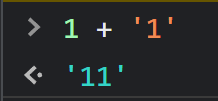

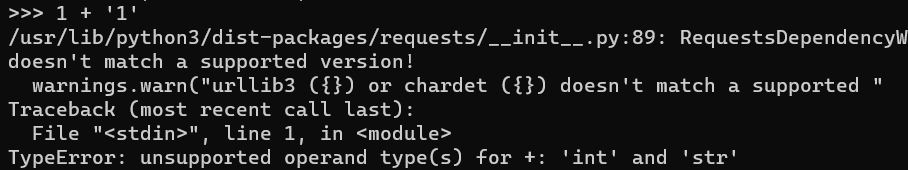

При написании кода мы так или иначе предполагаем переменные каких типов будут использоваться (это может быть вызвано ограничением алгоритма или бизнес логики). И для корректной работы программы нам важно как можно раньше найти ошибки, связанные с передачей данных неверного типа.

Аннотации типов просто считываются интерпретатором Python и никак более не обрабатываются, но доступны для использования из стороннего кода и в первую очередь рассчитаны для использования статическими анализаторами.

### Синтаксис тайпинга

То, что принимаем, пишем через двоеточие (`:`), а то что отдаём через стрелочку (`->`). Попробуем сделать тайпинг того кода, который у нас уже есть.

P.S. `__init__` никогда ничего не возвращает, поэтому писать `None` избыточно. Это необходимо только если `__init__` не принимает никаких других аннотированных аргументов. То есть `__init__` считается полностью аннотированным, если есть аннотированные аргументы, либо если их нет, но есть аннотированный `None`.

In [ ]:
import re

class Word:

    def __init__(self, glossed: str, gloss: str):
        self.glossed = glossed
        self.gloss = gloss


    def __len__(self) -> int:
       word = re.sub(r'[-.=:]', '', self.glossed)
       return len(word)


    def __str__(self) -> str:
        return f'{self.glossed}\n{self.gloss}'

    __repr__ = __str__

## Продолжение работы с классом `Word`

Давайте теперь напишем, слова на каких языках, могут быть в нашем коде. Сделаем это в атрибуте класса.

In [ ]:
class Word:

    allowed_languages = ['русский', 'английский']

    def __init__(self, glossed: str, gloss: str):
        self.glossed = glossed
        self.gloss = gloss


    def __len__(self) -> int:
       word = re.sub(r'[-.=:]', '', self.glossed)
       return len(word)


    def __str__(self) -> str:
        return f'{self.glossed}\n{self.gloss}'

    __repr__ = __str__

In [32]:
# Word.allowed_languages

mother = Word(glossed='ма=м-а:а', gloss='mother-NOM.SG')
mother.allowed_languages

['русский', 'английский']

Давайте изначально наш класс будет принимать ещё один аргумент $-$ язык. Если язык, который пытается ввести пользователь, отсутствует в списке разрешённых языков, то нужно спросить у пользователя хочет ли он добавить язык в список разрешённых: если да, то создать экземпляр класса, если нет $-$ вывести ошибку `Выберите поддерживаемый язык, список поддерживаемых языков: [список]`.

In [40]:
class Word:

    allowed_languages = ['русский', 'английский']

    def __init__(self, glossed: str, gloss: str, language: str):
        self.glossed = glossed
        self.gloss = gloss
        self.language = language
        
        if self.language in self.allowed_languages:
            return
        self._check_language()


    def _check_language(self):
        verdict = input('Языка нет в списке разрешенных. Добавить? (да / нет)')
        if verdict == 'да':
            self.allowed_languages.append(self.language)
        else:
            raise ValueError(f'Выберите поддерживаемый язык, список поддерживаемых языков: {self.allowed_languages}')


    def __len__(self) -> int:
       word = re.sub(r'[-.=:]', '', self.glossed)
       return len(word)


    def __str__(self) -> str:
        return f'{self.glossed}\n{self.gloss}'

    __repr__ = __str__

In [41]:
mother = Word(glossed='ма=м-а:а', gloss='mother-NOM.SG', language='хантыйский')

ValueError: Выберите поддерживаемый язык, список поддерживаемых языков: ['русский', 'английский']

In [39]:
mother.language

'хантыйский'

Нужно написать метод `count_morphemes`, который скажет, сколько в слове морфем. На вход этот метод принимает строку с возможными разделителями, например `.-=<>`.

In [ ]:
class Word:

    allowed_languages = ['русский', 'английский']

    def __init__(self, glossed: str, gloss: str, language: str):
        self.glossed = glossed
        self.gloss = gloss
        self.language = language
        
        if self.language in self.allowed_languages:
            return
        self._check_language()


    def _check_language(self):
        verdict = input('Языка нет в списке разрешенных. Добавить? (да / нет)')
        if verdict == 'да':
            self.allowed_languages.append(self.language)
        else:
            raise ValueError(f'Выберите поддерживаемый язык, список поддерживаемых языков: {self.allowed_languages}')


    def __len__(self) -> int:
       word = re.sub(r'[-.=:]', '', self.glossed)
       return len(word)
    
    # неидеальное
    # def count_morphemes(self, delimiters: str) -> int:
    #     count_morph = 1
    #     for symb in self.glossed:
    #         if symb in delimiters:
    #             count_morph += 1
    #     return count_morph

    def count_morphemes(self, delimiters: str) -> int:
        delimiters = delimiters.replace('-', '') + '-'
        word = re.sub(f'[{delimiters}]', '@', self.glossed)
        splitted_word = word.split('@')

        return len([word for word in splitted_word if word != ''])

    def __str__(self) -> str:
        return f'{self.glossed}\n{self.gloss}'

    __repr__ = __str__

In [57]:
Word('мам-а==аааааааааа.', 'mother-NOM.SG=а', 'русский').count_morphemes('.-=')

3

А если мы хотим еще сами морфемы получить?

In [ ]:
class Word:

    allowed_languages = ['русский', 'английский']

    def __init__(self, glossed: str, gloss: str, language: str):
        self.glossed = glossed
        self.gloss = gloss
        self.language = language
        
        if self.language in self.allowed_languages:
            return
        self._check_language()


    def _check_language(self):
        verdict = input('Языка нет в списке разрешенных. Добавить? (да / нет)')
        if verdict == 'да':
            self.allowed_languages.append(self.language)
        else:
            raise ValueError(f'Выберите поддерживаемый язык, список поддерживаемых языков: {self.allowed_languages}')


    def __len__(self) -> int:
       word = re.sub(r'[-.=:]', '', self.glossed)
       return len(word)
    
    def count_morphemes(self, delimiters: str) -> int:
        return len(self.get_morphemes(delimiters))

    def get_morphemes(self, delimiters: str) -> str:
        delimiters = delimiters.replace('-', '') + '-'
        word = re.sub(f'[{delimiters}]', '@', self.glossed)
        splitted_word = word.split('@')

        return [word for word in splitted_word if word != '']

    def __str__(self) -> str:
        return f'{self.glossed}\n{self.gloss}'

    __repr__ = __str__

In [61]:
Word('мам-а==аааааааааа.', 'mother-NOM.SG=а', 'русский').get_morphemes('.-=')

['мам', 'а', 'аааааааааа']